In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## The purpose of this work is to predict binding energy between chitosan and collagen type II

## Part 1: Data Exploration

In [60]:
df = pd.read_csv('/content/All_interactions.csv')

In [61]:
df.describe()

,id,DD,HD,Variant_HD,Variant_DD,Position,Hydrogen Bonds_ALA,Hydrogen Bonds_ARG,Hydrogen Bonds_GLN,Hydrogen Bonds_GLU,...,Ionic Interactions_PRO,Hydrophobic Interactions_ALA,Hydrophobic Interactions_ARG,Hydrophobic Interactions_GLN,Hydrophobic Interactions_GLU,Hydrophobic Interactions_GLY,Hydrophobic Interactions_HYP,Hydrophobic Interactions_LEU,Hydrophobic Interactions_PRO,Binding_Energy
count,38314.000000,38314.000000,38314.000000,38314.000000,38314.000000,38314.000000,38313.000000,38313.000000,38313.000000,38313.000000,...,38313.000000,38313.000000,38313.000000,38313.000000,38313.000000,38313.000000,38313.000000,38313.000000,38313.000000,37836.000000
mean,19156.500000,0.516143,0.514458,2.767500,2.938665,21.186955,0.536100,0.349733,0.386833,0.453987,...,0.000331,0.154923,0.141793,0.040745,0.112003,0.047002,0.384473,0.177948,0.636981,-296.496320
std,11060.443443,0.258676,0.292259,1.422686,1.432841,12.046487,0.550967,0.459683,0.497434,0.523676,...,0.015748,0.211552,0.226192,0.108114,0.191295,0.094760,0.401581,0.261759,0.647696,114.312392
min,0.000000,0.125000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-790.240000
25%,9578.250000,0.250000,0.290000,1.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.100000,-372.187500
50%,19156.500000,0.500000,0.570000,3.000000,3.000000,21.000000,0.450000,0.100000,0.030000,0.230000,...,0.000000,0.060000,0.030000,0.000000,0.000000,0.000000,0.290000,0.030000,0.450000,-291.500000
75%,28734.750000,0.750000,0.710000,4.000000,4.000000,31.000000,0.940000,0.680000,0.810000,0.900000,...,0.000000,0.260000,0.190000,0.000000,0.160000,0.060000,0.580000,0.290000,1.000000,-215.397500
max,38313.000000,1.000000,1.000000,5.000000,5.000000,48.000000,3.450000,2.970000,2.970000,2.940000,...,1.000000,1.900000,2.740000,1.320000,2.190000,1.130000,3.650000,2.520000,5.480000,359.680000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38314 entries, 0 to 38313
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38314 non-null  int64  
 1   DD                            38314 non-null  float64
 2   HD                            38314 non-null  float64
 3   Variant_HD                    38314 non-null  int64  
 4   Variant_DD                    38314 non-null  int64  
 5   Position                      38314 non-null  int64  
 6   Hydrogen Bonds_ALA            38313 non-null  float64
 7   Hydrogen Bonds_ARG            38313 non-null  float64
 8   Hydrogen Bonds_GLN            38313 non-null  float64
 9   Hydrogen Bonds_GLU            38313 non-null  float64
 10  Hydrogen Bonds_GLY            38313 non-null  float64
 11  Hydrogen Bonds_HYP            38313 non-null  float64
 12  Hydrogen Bonds_LEU            38313 non-null  float64
 13  H

In [63]:
df = df.dropna(axis=0,how='any')

In [65]:
df['Hydrogen Bonds_Other'] = df['Hydrogen Bonds_ALA'] + df['Hydrogen Bonds_ARG'] + df['Hydrogen Bonds_GLU'] + df['Hydrogen Bonds_GLN'] + df['Hydrogen Bonds_LEU']
df['Hydrophobic Interactions_Other'] = df['Hydrophobic Interactions_ALA'] + df['Hydrophobic Interactions_ARG'] + df['Hydrophobic Interactions_GLU'] + df['Hydrophobic Interactions_GLN'] + df['Hydrophobic Interactions_LEU']
df['Ionic Interactions_Other'] = df['Ionic Interactions_ALA'] + df['Ionic Interactions_ARG'] + df['Ionic Interactions_GLU'] + df['Ionic Interactions_GLN'] + df['Ionic Interactions_LEU']

In [66]:
df = df.drop(columns=['id','Hydrogen Bonds_ALA','Hydrogen Bonds_ARG','Hydrogen Bonds_GLU','Hydrogen Bonds_GLN',
                      'Hydrogen Bonds_LEU','Hydrophobic Interactions_ALA','Hydrophobic Interactions_ARG','Hydrophobic Interactions_GLU',
                      'Hydrophobic Interactions_GLN','Hydrophobic Interactions_LEU','Ionic Interactions_ALA','Ionic Interactions_ARG',
                      'Ionic Interactions_GLU','Ionic Interactions_GLN','Ionic Interactions_LEU'])

In [67]:
df.isnull().values.any()

False

In [68]:
df = df.loc[:, (df != 0).any(axis=0)]

In [ ]:
#df = df.query('HD==0.43')

In [69]:
x = df.drop(columns='Binding_Energy')
y = df['Binding_Energy']

<Axes: title={'center': 'Correlated with Exited'}>

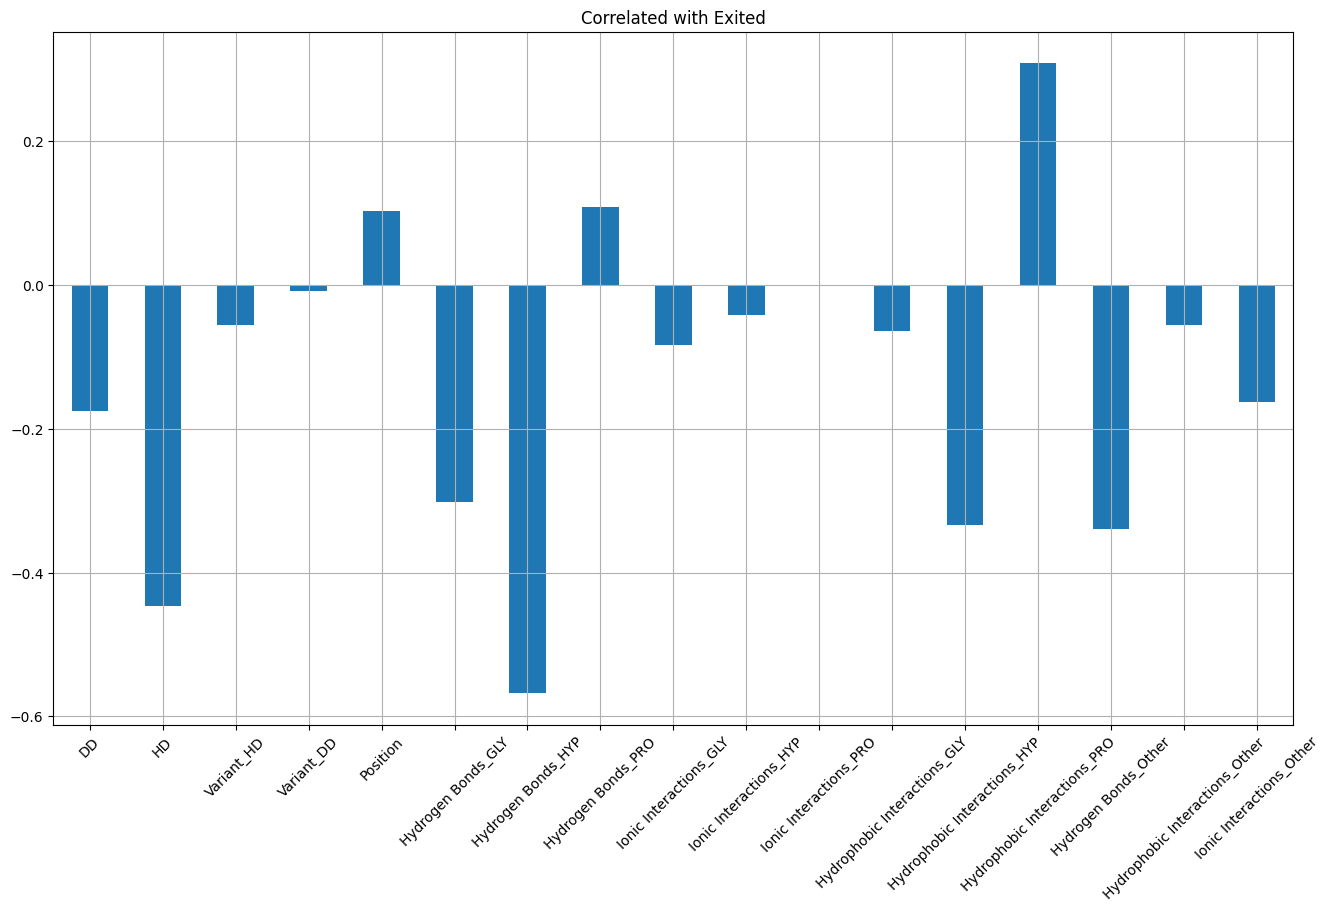

In [70]:
x.corrwith(y).plot.bar(figsize=(16,9), title='Correlated with Exited', rot=45, grid=True)

In [87]:
corr = df.corr()

<Axes: >

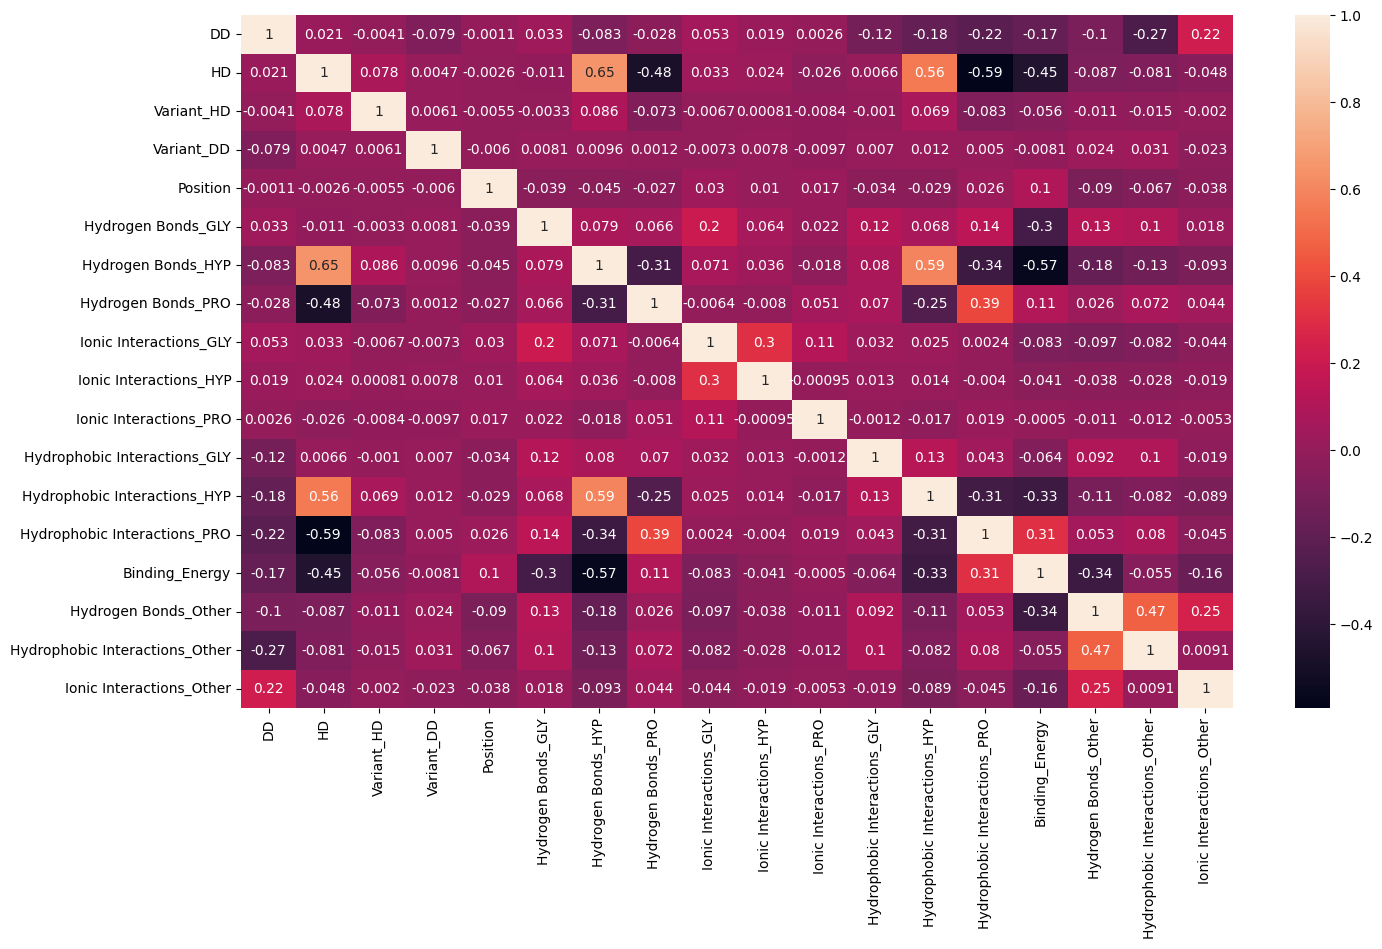

In [88]:
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)

(30268, 17)


## Part 2: Building a model

### Linear regression

In [72]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [73]:
y_pred = regressor_lr.predict(x_test)

In [74]:
from sklearn.metrics import  r2_score

In [75]:
r2_score(y_test, y_pred)

0.6608247601700146

### Random forrest

In [76]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [78]:
y_pred = regressor_rf.predict(x_test)
r2_score(y_test, y_pred)

0.6702302387683454

### XGBoost regression

In [79]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [80]:
y_pred = regressor_xgb.predict(x_test)

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5977188530309523

## Part 3: Hyperparameter tuning

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_regression


In [89]:
parameters = {
    'n_estimators':[100, 500],
    'max_depth':[10, 50],
    'min_samples_split':[2, 5],
    'min_samples_leaf':[1, 2],
    'max_features':['auto', 'sqrt'],
    'bootstrap':[True, False]
}

In [90]:
random_cv = RandomizedSearchCV(estimator=regressor_rf, param_distributions=parameters, n_iter=10, cv=3,
                               verbose=2, n_jobs=-1, random_state=0)

In [91]:
random_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 500]},
                   random_state=0, verbose=2)

In [92]:
random_cv.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=500)

In [93]:
random_cv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

## Part 4: Final model (Random forest regressor)

In [94]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='squared_error',
                                  max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                                  max_samples=None, min_impurity_decrease=0.0,
                                  min_samples_leaf=1, min_samples_split=2,
                                  min_weight_fraction_leaf=0.0, n_estimators=1200,
                                  n_jobs=None, oob_score=False, random_state=None,
                                  verbose=0, warm_start=False)

In [95]:
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      n_estimators=1200)

In [96]:
y_pred = regressor.predict(x_test)

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6770813662626072